# *** READ ME ***
This kernel is the third and last code (3/3) used for the 2024 G3P in-situ evaluation.
This code allows to conduct comparison between in-situ data (GWSA and GWSAs) and G3P data (GWSA). The Paris Basin is here take as an exemple.  
The inputs are: ParisBasin_GWLA_GWSA.xlsx (from kernel 1) ; ParisBasin_G3P_GWSA.xlsx (from kernel 2)  
The outputs are: none

# *****************

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymannkendall as mk
import pandas as pd

# 1. Bringing G3P data

In [2]:
v1_12 = pd.read_excel('ParisBasin_G3P_GWSA.xlsx', index_col=0)
                     
v1_12 = v1_12.interpolate(method='linear', axis=0) # fill instrumental errors (NaN)
v1_12.loc[(v1_12.index >= '2017-07-31') & (v1_12.index <= '2018-05-31')] = np.nan  # Conserve NaN during generations switch (2017-18)

v1_12

,v12_GWSA,v12_uncertainty
2002-04-30,27.537516,47.040745
2002-05-31,40.819672,47.351858
2002-06-30,47.680515,46.973548
2002-07-31,54.541358,46.595238
2002-08-31,61.402201,46.216928
...,...,...
2023-05-31,-11.237861,47.378401
2023-06-30,-73.481586,46.024181
2023-07-31,-99.910050,46.093174
2023-08-31,-70.526606,45.785023


# 2. Bring in-situ data

In [3]:
in_situ = pd.read_excel('ParisBasin_GWLA_GWSA.xlsx', index_col=0)
in_situ

,GWLA,minGWSA,aveGWSA
date,,,
2002-04-30,2.369726,44.752361,154.189115
2002-05-31,1.759220,34.251762,118.908467
2002-06-30,1.364703,28.934388,96.952304
2002-07-31,0.812118,19.158358,64.018078
2002-08-31,0.450385,12.799260,41.621935
...,...,...,...
2023-05-31,-0.163681,-5.972412,-13.918581
2023-06-30,-0.632925,-15.611402,-42.288552
2023-07-31,-1.022592,-23.951753,-67.816790


# Merged G3P and in-situ data in one unique dataframe

In [4]:
merged_df = pd.merge(v1_12, in_situ, left_index=True, right_index=True)
merged_df = merged_df.resample('M').mean()
merged_df

,v12_GWSA,v12_uncertainty,GWLA,minGWSA,aveGWSA
2002-04-30,27.537516,47.040745,2.369726,44.752361,154.189115
2002-05-31,40.819672,47.351858,1.759220,34.251762,118.908467
2002-06-30,47.680515,46.973548,1.364703,28.934388,96.952304
2002-07-31,54.541358,46.595238,0.812118,19.158358,64.018078
2002-08-31,61.402201,46.216928,0.450385,12.799260,41.621935
...,...,...,...,...,...
2023-05-31,-11.237861,47.378401,-0.163681,-5.972412,-13.918581
2023-06-30,-73.481586,46.024181,-0.632925,-15.611402,-42.288552
2023-07-31,-99.910050,46.093174,-1.022592,-23.951753,-67.816790
2023-08-31,-70.526606,45.785023,-1.111088,-25.124190,-72.600753


# 3. GWLA vs GWSA: Statistical tests and plot

In [5]:
# First, we need to normalize the data
def normalize_column(column):
    return (column - column.mean()) / column.std()

merged_df_normalized = merged_df.apply(normalize_column, axis=0)

print(merged_df_normalized.to_string())
merged_df_normalized

            v12_GWSA  v12_uncertainty      GWLA   minGWSA   aveGWSA
2002-04-30  1.000624         0.241680  2.653421  2.521265  2.726569
2002-05-31  1.406309         0.404065  1.969828  1.929681  2.102691
2002-06-30  1.615864         0.206606  1.528080  1.630110  1.714434
2002-07-31  1.825419         0.009147  0.909342  1.079346  1.132049
2002-08-31  2.034974        -0.188311  0.504303  0.721087  0.736012
2002-09-30  1.628366         0.202766  0.329070  0.557069  0.550895
2002-10-31  2.002561        -0.654511  0.195910  0.397395  0.384681
2002-11-30  2.562490        -0.218482  0.989175  1.072371  1.066173
2002-12-31  2.833116         0.934420  1.593346  1.711585  1.665327
2003-01-31  2.484932         3.531124  2.780348  2.812301  2.817207
2003-02-28  2.657935         0.255355  2.955721  3.048177  3.031591
2003-03-31  2.029154        -0.122252  2.467507  2.687867  2.645119
2003-04-30  1.134292        -0.367239  1.833014  2.069922  2.044943
2003-05-31  1.136310        -0.068605  1.499833 

,v12_GWSA,v12_uncertainty,GWLA,minGWSA,aveGWSA
2002-04-30,1.000624,0.241680,2.653421,2.521265,2.726569
2002-05-31,1.406309,0.404065,1.969828,1.929681,2.102691
2002-06-30,1.615864,0.206606,1.528080,1.630110,1.714434
2002-07-31,1.825419,0.009147,0.909342,1.079346,1.132049
2002-08-31,2.034974,-0.188311,0.504303,0.721087,0.736012
...,...,...,...,...,...
2023-05-31,-0.183717,0.417920,-0.183277,-0.336475,-0.246126
2023-06-30,-2.084866,-0.288916,-0.708697,-0.879517,-0.747800
2023-07-31,-2.892087,-0.252905,-1.145014,-1.349397,-1.199223
2023-08-31,-1.994610,-0.413744,-1.244104,-1.415450,-1.283819


Scipy computed Pearson r between v1.12 GWSA and in-situ (grid-based) : 0.6312199578880314 (p = 7.34361138668138e-29)


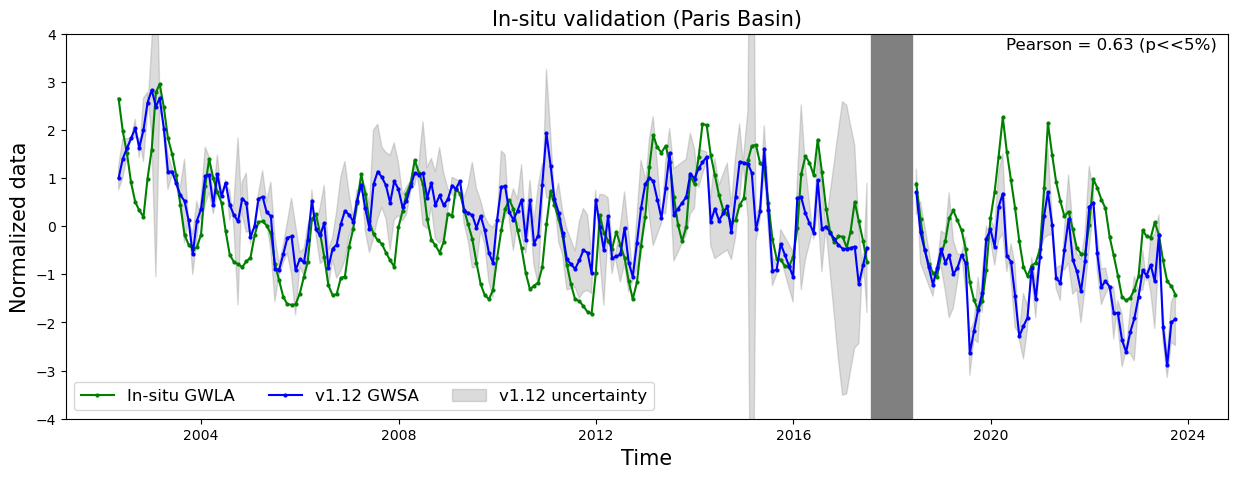

In [6]:
# Pearson
r, p = stats.pearsonr(merged_df_normalized.dropna().GWLA, merged_df_normalized.dropna().v12_GWSA)
print(f"Scipy computed Pearson r between v1.12 GWSA and in-situ (grid-based) : {r} (p = {p})")

# Plot
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot(merged_df_normalized.GWLA, c='green', marker='o', markersize=2, label='In-situ GWLA')
ax1.plot(merged_df_normalized.v12_GWSA, c='blue', marker='o', markersize=2, label='v1.12 GWSA')
ax1.fill_between(merged_df_normalized.index, merged_df_normalized.v12_GWSA - merged_df_normalized.v12_uncertainty, merged_df_normalized.v12_GWSA + merged_df_normalized.v12_uncertainty, color='#888888', alpha=0.3, label='v1.12 uncertainty')
#ax1.plot(merged_df['minGWSA_grid_based_monthly_average'].index, insitu_trend, color='green', linestyle='--', label='In-situ MK-trend')
#ax1.plot(merged_df['minGWSA_grid_based_monthly_average'].index, v12_trend, color='blue', linestyle='--', label='v1.12 MK-trend')

# Generation switch
x = merged_df.index
y_nan_all = merged_df.isna().all(axis=1)
ax1.fill_between(x, ax1.get_ylim()[0], ax1.get_ylim()[1], where=y_nan_all, color='gray', alpha=1)

plt.title("In-situ validation (Paris Basin)", fontsize=15, color="k")
ax1.legend(loc='lower left', fontsize=12, ncol=3)
ax1.set_xlabel('Time', fontsize=15)
ax1.set_ylabel('Normalized data', fontsize=15)
ax1.text(.99, .99, f"Pearson = {r:.2f} (p<<5%)", fontsize=12, color='black', ha='right', va='top', transform=ax1.transAxes)
#ax1.text(0.01, 0.35, f"y = {insituMK.slope:.2f}x +{insituMK.intercept:.2f}", fontsize=10, color='green', fontweight='bold', transform=ax1.transAxes)
#ax1.text(0.15, 0.7, f"y = {v12MK.slope:.2f}x +{v12MK.intercept:.2f}", fontsize=10, color='blue', fontweight='bold', transform=ax1.transAxes)

ax1.set_ylim(-4, 4)

plt.show()

# 4. GWSA vs GWSA: Statistical tests and plot

Scipy computed Pearson r between v1.12 GWSA and in-situ (grid-based) : 0.6469308221510572 (p = 1.1199633062335916e-30)
Tau = -0.0869951614495902, p = 0.04178567650248288, h = True, trend = decreasing, slope = -0.030036499435664953, intercept = 1.9320833357540552
Equation de insitu reg : y = -0.030036499435664953x +1.9320833357540552
Tau = -0.417201540436457, p = 0.0, h = True, trend = decreasing, slope = -0.263358732885461, intercept = 30.293670951692793
Equation de v1.12 reg : y = -0.263358732885461x +30.293670951692793
RMSE entre 'minGWSA' et 'v12_GWSA' : 25.686036475243895


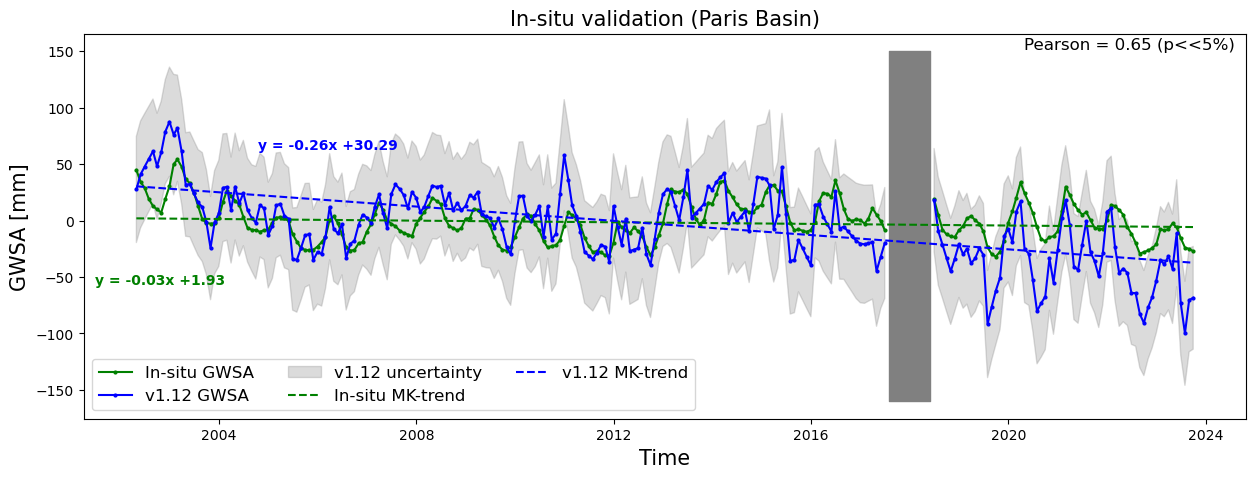

In [7]:
# Pearson
r, p = stats.pearsonr(merged_df.dropna().minGWSA, merged_df.dropna().v12_GWSA)
print(f"Scipy computed Pearson r between v1.12 GWSA and in-situ (grid-based) : {r} (p = {p})")

# In-situ MK
insituMK = mk.original_test(merged_df['minGWSA']) # fait le test
insitu_res = mk.hamed_rao_modification_test(merged_df['minGWSA']) # calcul la reg
insitu_trend = np.arange(len(merged_df['minGWSA'])) * insitu_res.slope + insitu_res.intercept # calcul les coordonnées
print(f"Tau = {insituMK.Tau}, p = {insituMK.p}, h = {insituMK.h}, trend = {insituMK.trend}, slope = {insituMK.slope}, intercept = {insituMK.intercept}")
print(f"Equation de insitu reg : y = {insituMK.slope}x +{insituMK.intercept}")

# G3P MK
v12MK = mk.original_test(merged_df['v12_GWSA']) # fait le test
v12_res = mk.hamed_rao_modification_test(merged_df['v12_GWSA']) # calcul la reg
v12_trend = np.arange(len(merged_df['v12_GWSA'])) * v12_res.slope + v12_res.intercept # calcul les coordonnées
print(f"Tau = {v12MK.Tau}, p = {v12MK.p}, h = {v12MK.h}, trend = {v12MK.trend}, slope = {v12MK.slope}, intercept = {v12MK.intercept}")
print(f"Equation de v1.12 reg : y = {v12MK.slope}x +{v12MK.intercept}")

# RMSE (Root Mean Squarred Error)
rmse = np.sqrt(((merged_df['minGWSA'].dropna() - merged_df['v12_GWSA'].dropna()) ** 2).mean())
print(f"RMSE entre 'minGWSA' et 'v12_GWSA' : {rmse}")

# Plot
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot(merged_df.minGWSA, c='green', marker='o', markersize=2, label='In-situ GWSA')
ax1.plot(merged_df.v12_GWSA, c='blue', marker='o', markersize=2, label='v1.12 GWSA')
ax1.fill_between(merged_df.index, merged_df.v12_GWSA - merged_df.v12_uncertainty, merged_df.v12_GWSA + merged_df.v12_uncertainty, color='#888888', alpha=0.3, label='v1.12 uncertainty')
ax1.plot(merged_df['minGWSA'].index, insitu_trend, color='green', linestyle='--', label='In-situ MK-trend')
ax1.plot(merged_df['v12_GWSA'].index, v12_trend, color='blue', linestyle='--', label='v1.12 MK-trend')

# Generation switch
x = merged_df.index
y_nan_all = merged_df.isna().all(axis=1)
ax1.fill_between(x, ax1.get_ylim()[0], ax1.get_ylim()[1], where=y_nan_all, color='gray', alpha=1)

plt.title("In-situ validation (Paris Basin)", fontsize=15, color="k")
ax1.legend(loc='lower left', fontsize=12, ncol=3)
ax1.set_xlabel('Time', fontsize=15)
ax1.set_ylabel('GWSA [mm]', fontsize=15)
ax1.text(.99, .99, f"Pearson = {r:.2f} (p<<5%)", fontsize=12, color='black', ha='right', va='top', transform=ax1.transAxes)
ax1.text(0.01, 0.35, f"y = {insituMK.slope:.2f}x +{insituMK.intercept:.2f}", fontsize=10, color='green', fontweight='bold', transform=ax1.transAxes)
ax1.text(0.15, 0.7, f"y = {v12MK.slope:.2f}x +{v12MK.intercept:.2f}", fontsize=10, color='blue', fontweight='bold', transform=ax1.transAxes)

plt.show()